In [1]:
import pandas as pd
import numpy as np


In [2]:
df= pd.read_csv('/kaggle/input/weather-data/weather_data.csv')

In [3]:
df.describe()

,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,14.779705,60.021830,5.109639,14.997598
std,14.482558,17.324022,2.947997,8.663556
min,-19.969311,30.000009,0.000009,0.000051
25%,2.269631,45.008500,2.580694,7.490101
50%,14.778002,60.018708,5.109917,14.993777
75%,27.270489,75.043818,7.613750,22.514110
max,39.999801,89.999977,14.971583,29.999973


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Location          1000000 non-null  object 
 1   Date_Time         1000000 non-null  object 
 2   Temperature_C     1000000 non-null  float64
 3   Humidity_pct      1000000 non-null  float64
 4   Precipitation_mm  1000000 non-null  float64
 5   Wind_Speed_kmh    1000000 non-null  float64
dtypes: float64(4), object(2)
memory usage: 45.8+ MB


In [5]:
df.head()

,Location,Date_Time,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh
0,San Diego,2024-01-14 21:12:46,10.683001,41.195754,4.020119,8.233540
1,San Diego,2024-05-17 15:22:10,8.734140,58.319107,9.111623,27.715161
2,San Diego,2024-05-11 09:30:59,11.632436,38.820175,4.607511,28.732951
3,Philadelphia,2024-02-26 17:32:39,-8.628976,54.074474,3.183720,26.367303
4,San Antonio,2024-04-29 13:23:51,39.808213,72.899908,9.598282,29.898622


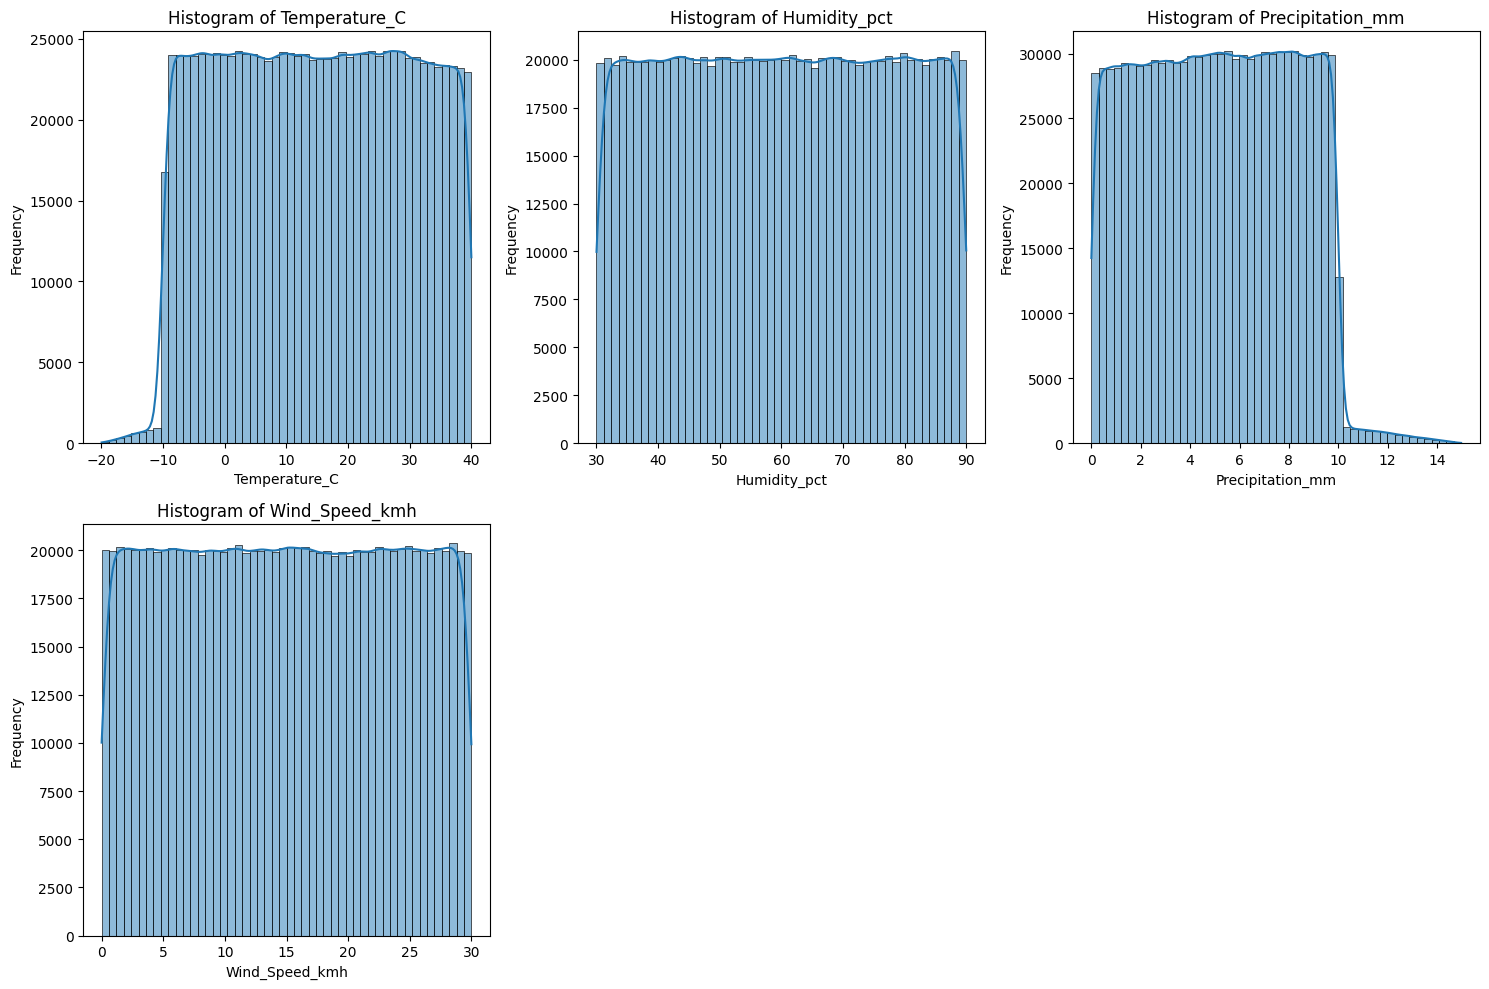

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

numerical = df.select_dtypes(include=['float64', 'int64']).columns


num_columns = 3
num_rows = -(-len(numerical) // num_columns)
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 5))


axes = axes.flatten()

for i, column in enumerate(numerical):
    sns.histplot(df[column], kde=True, bins=50, ax=axes[i])
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


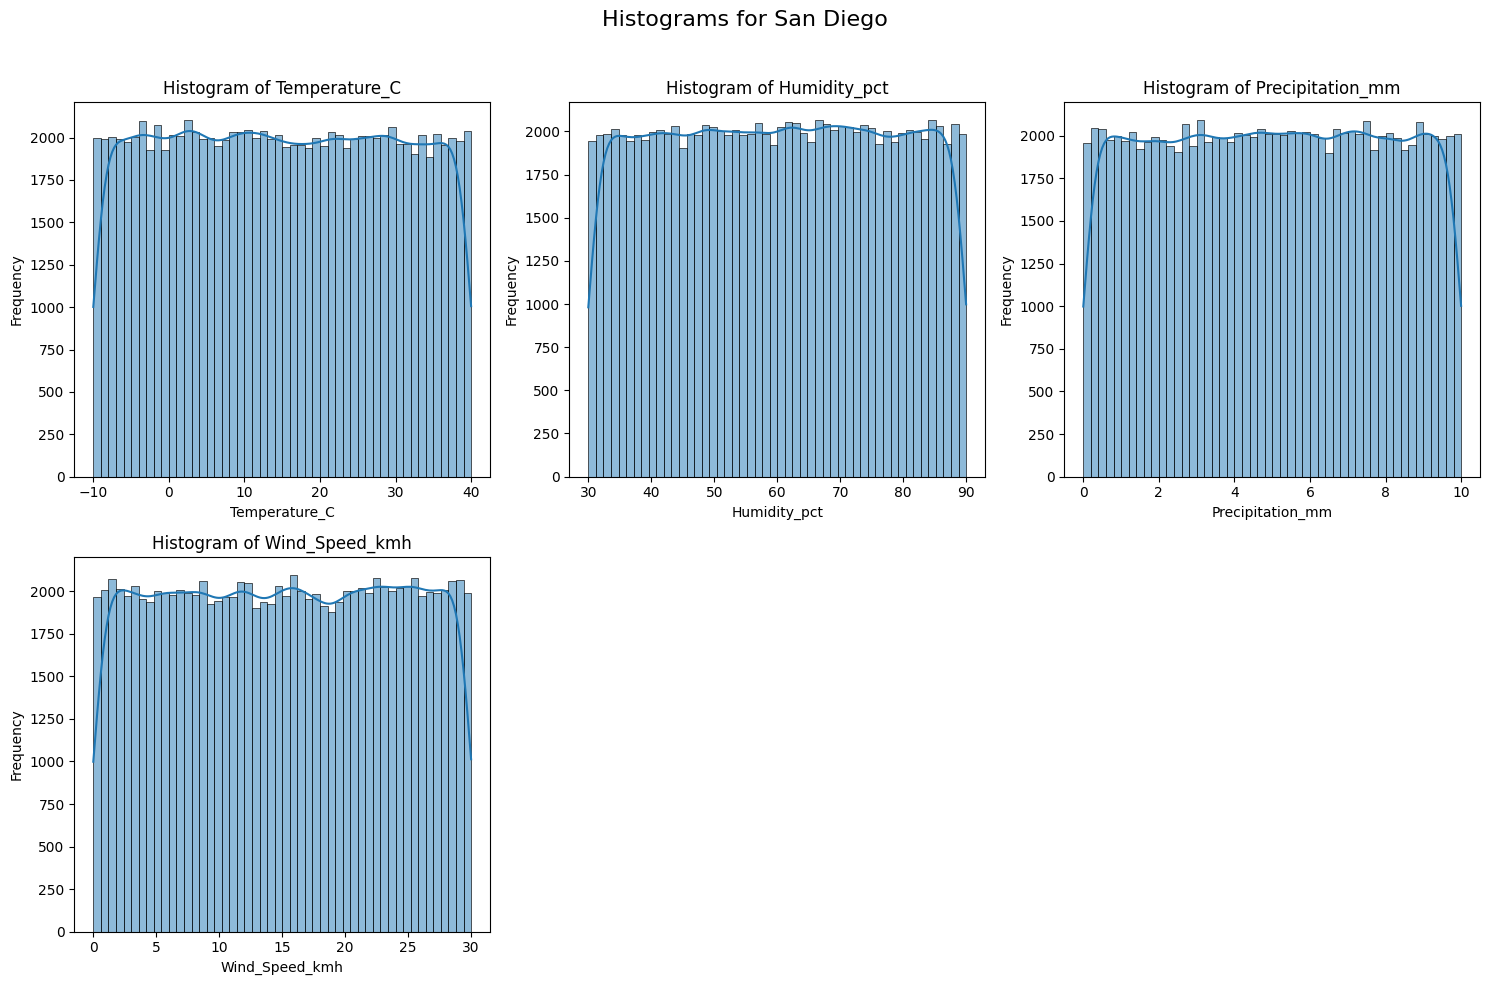

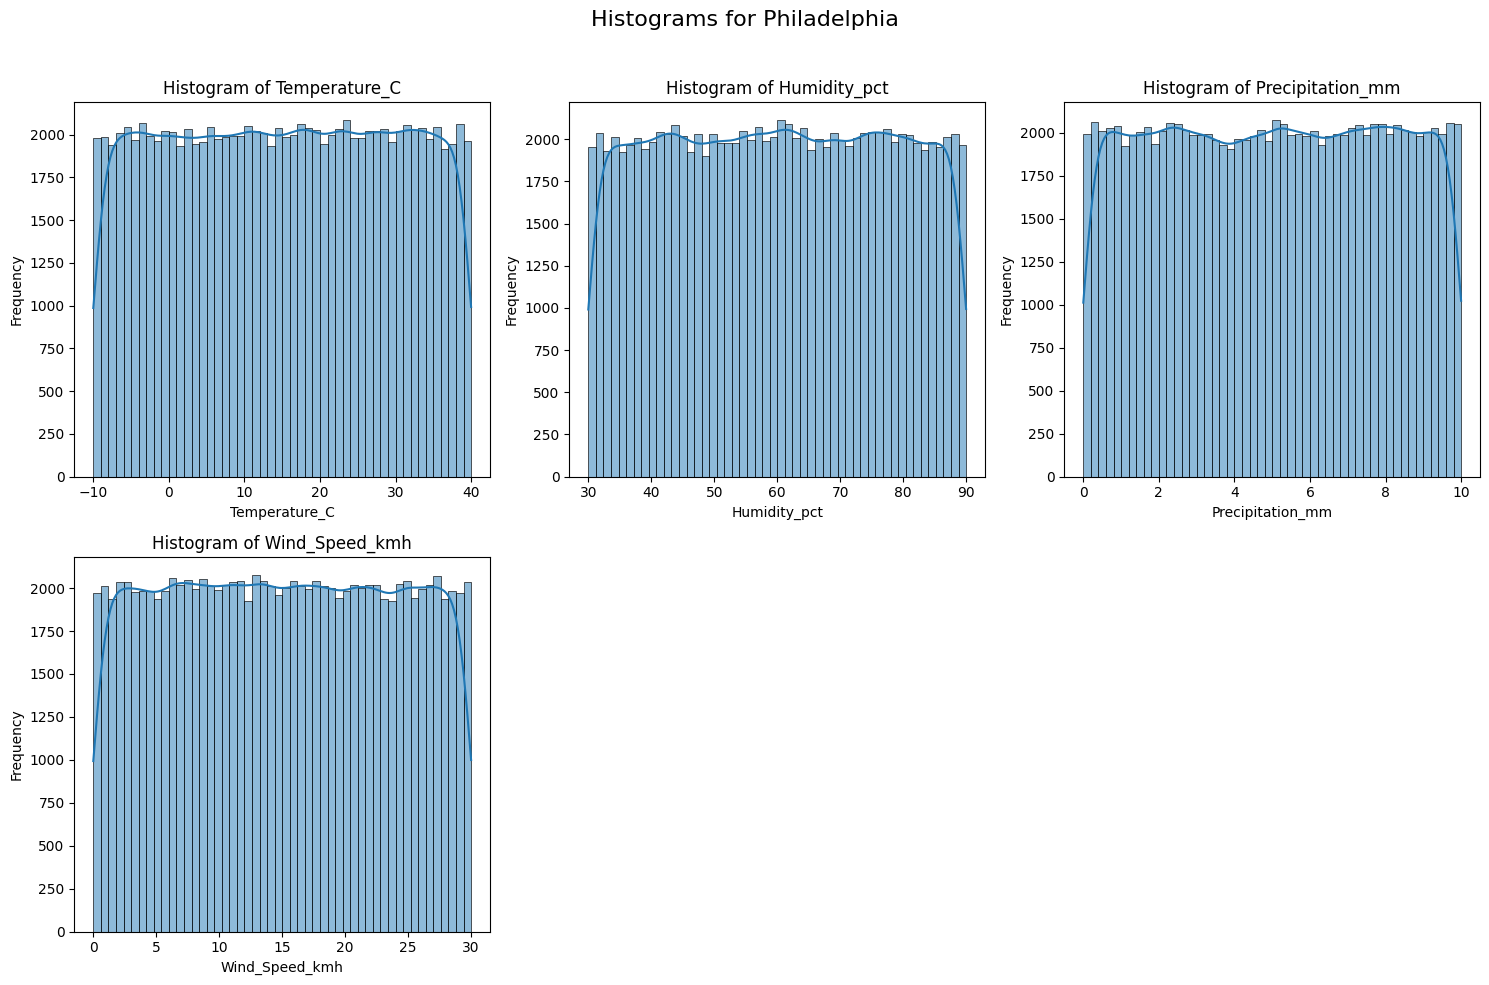

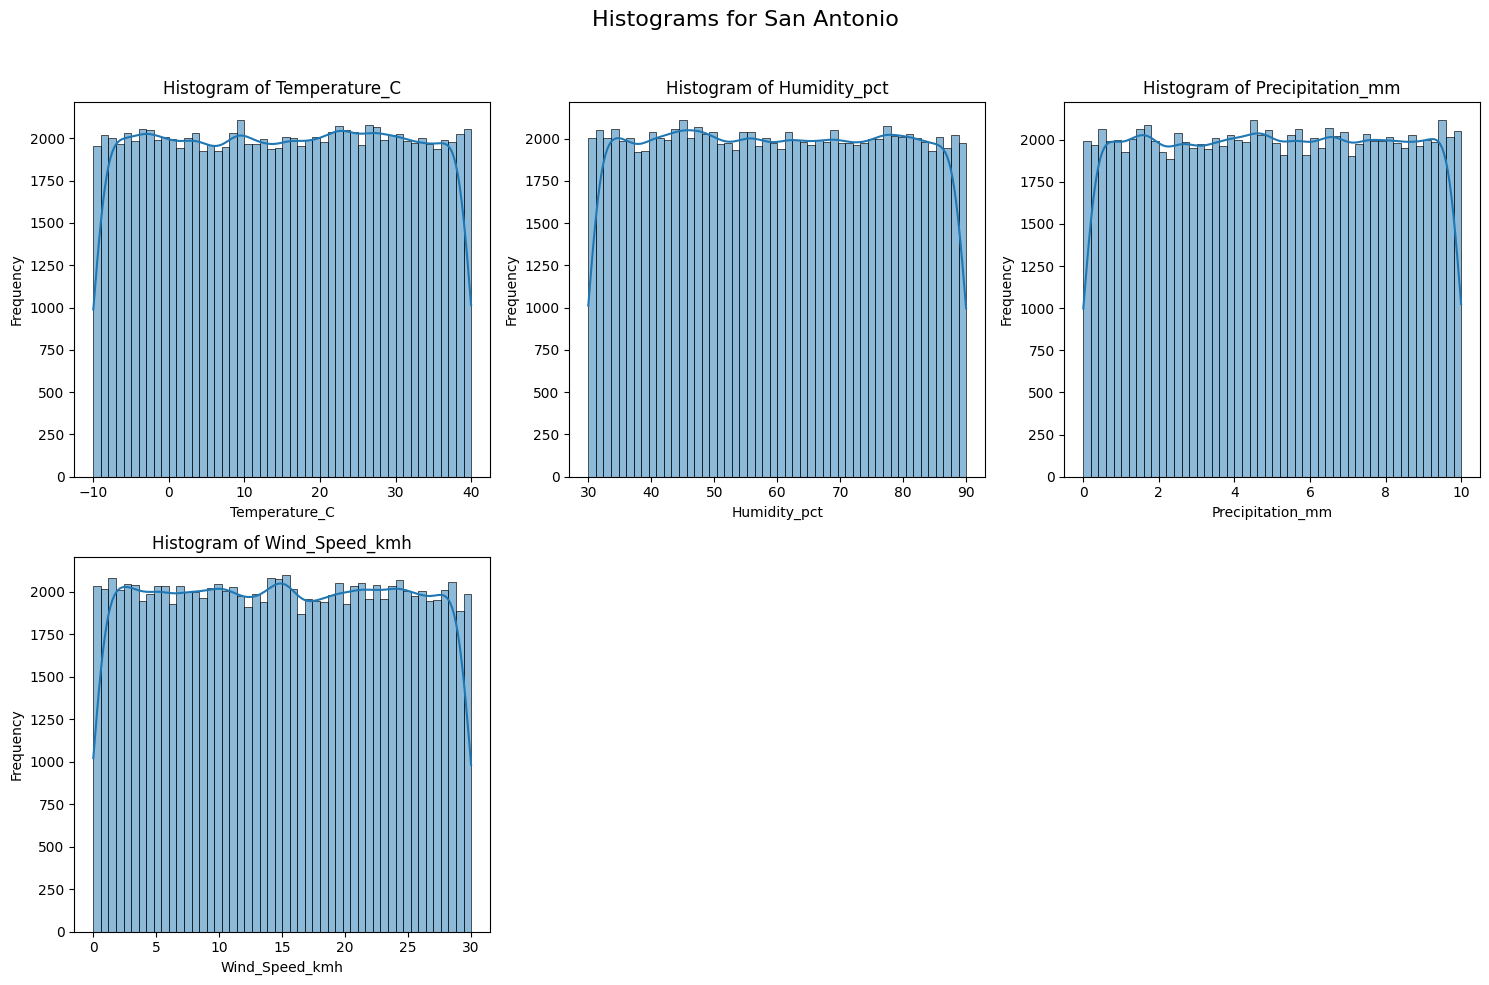

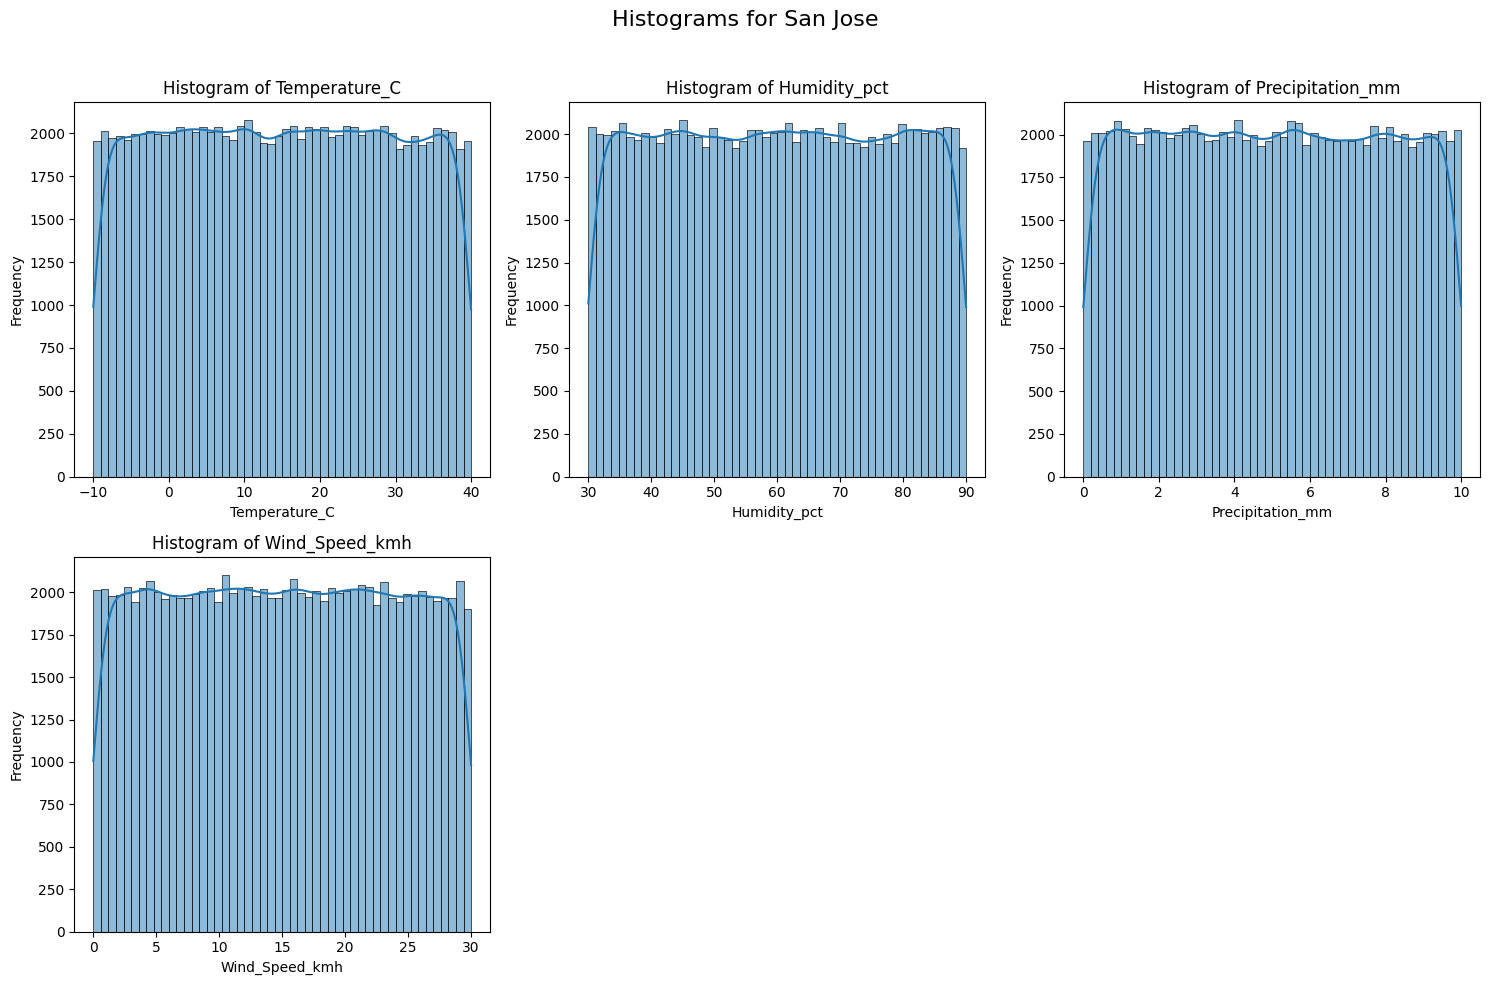

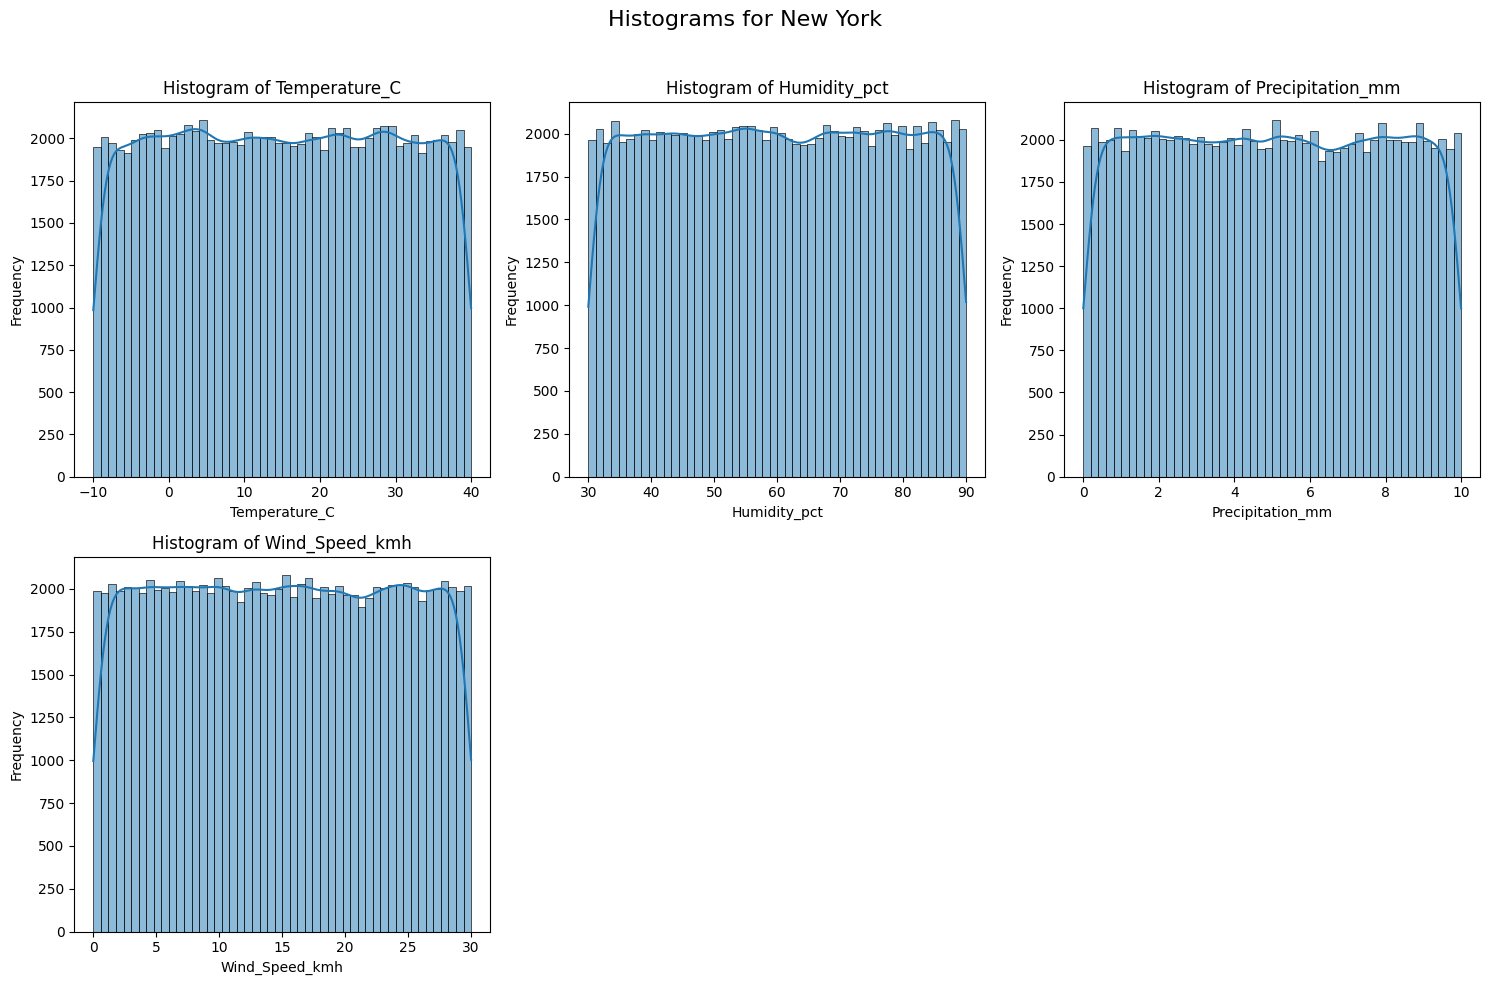

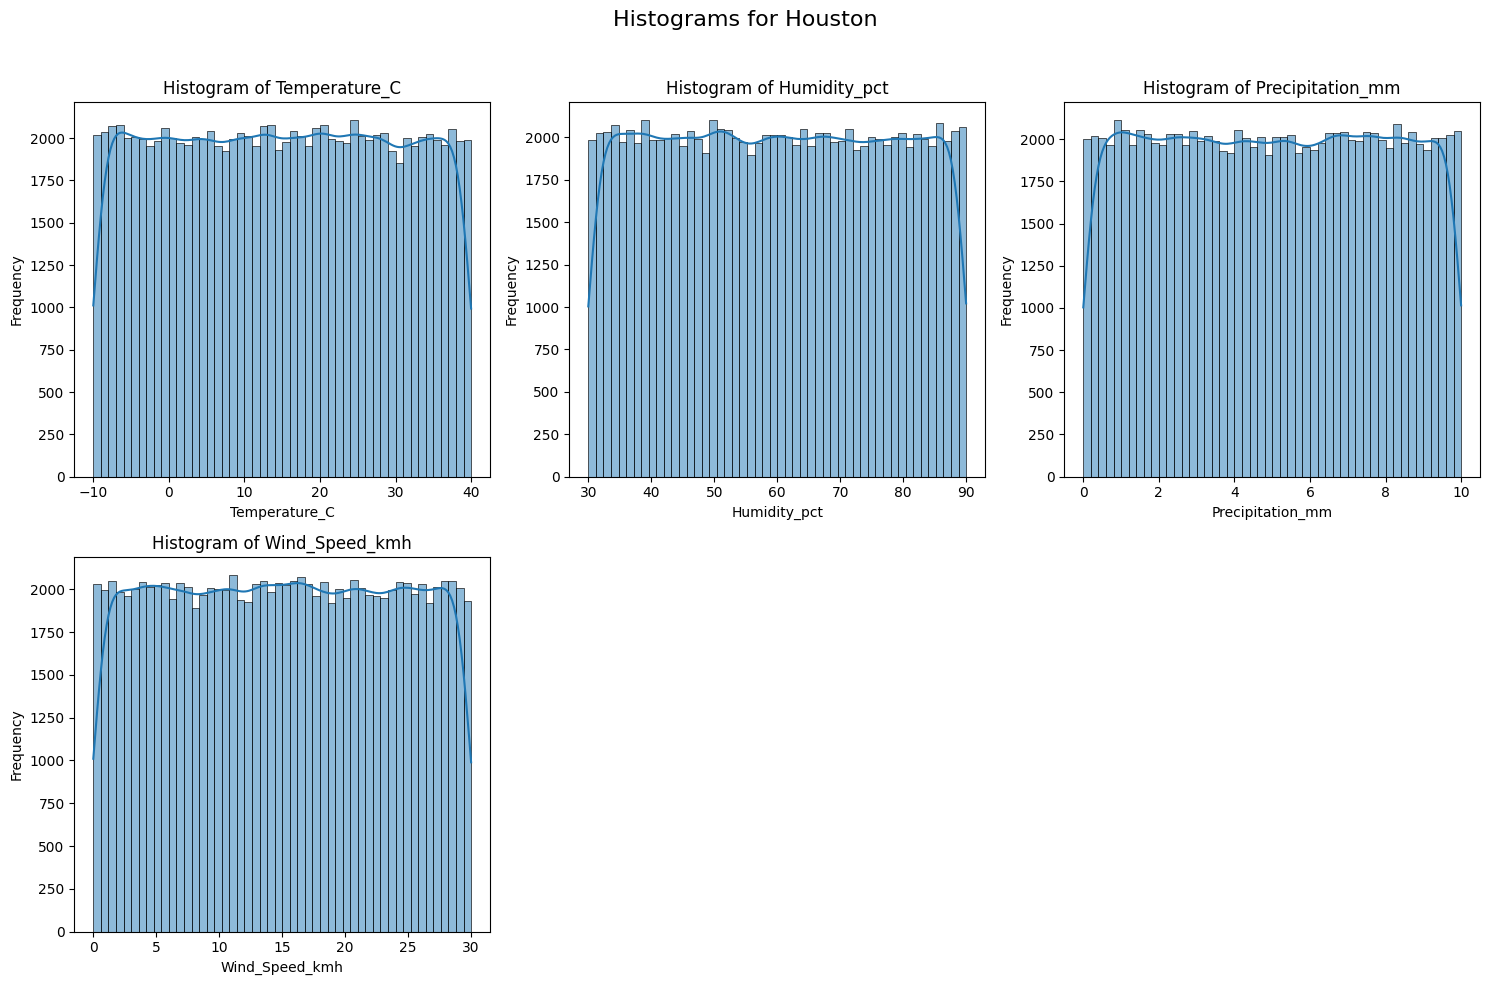

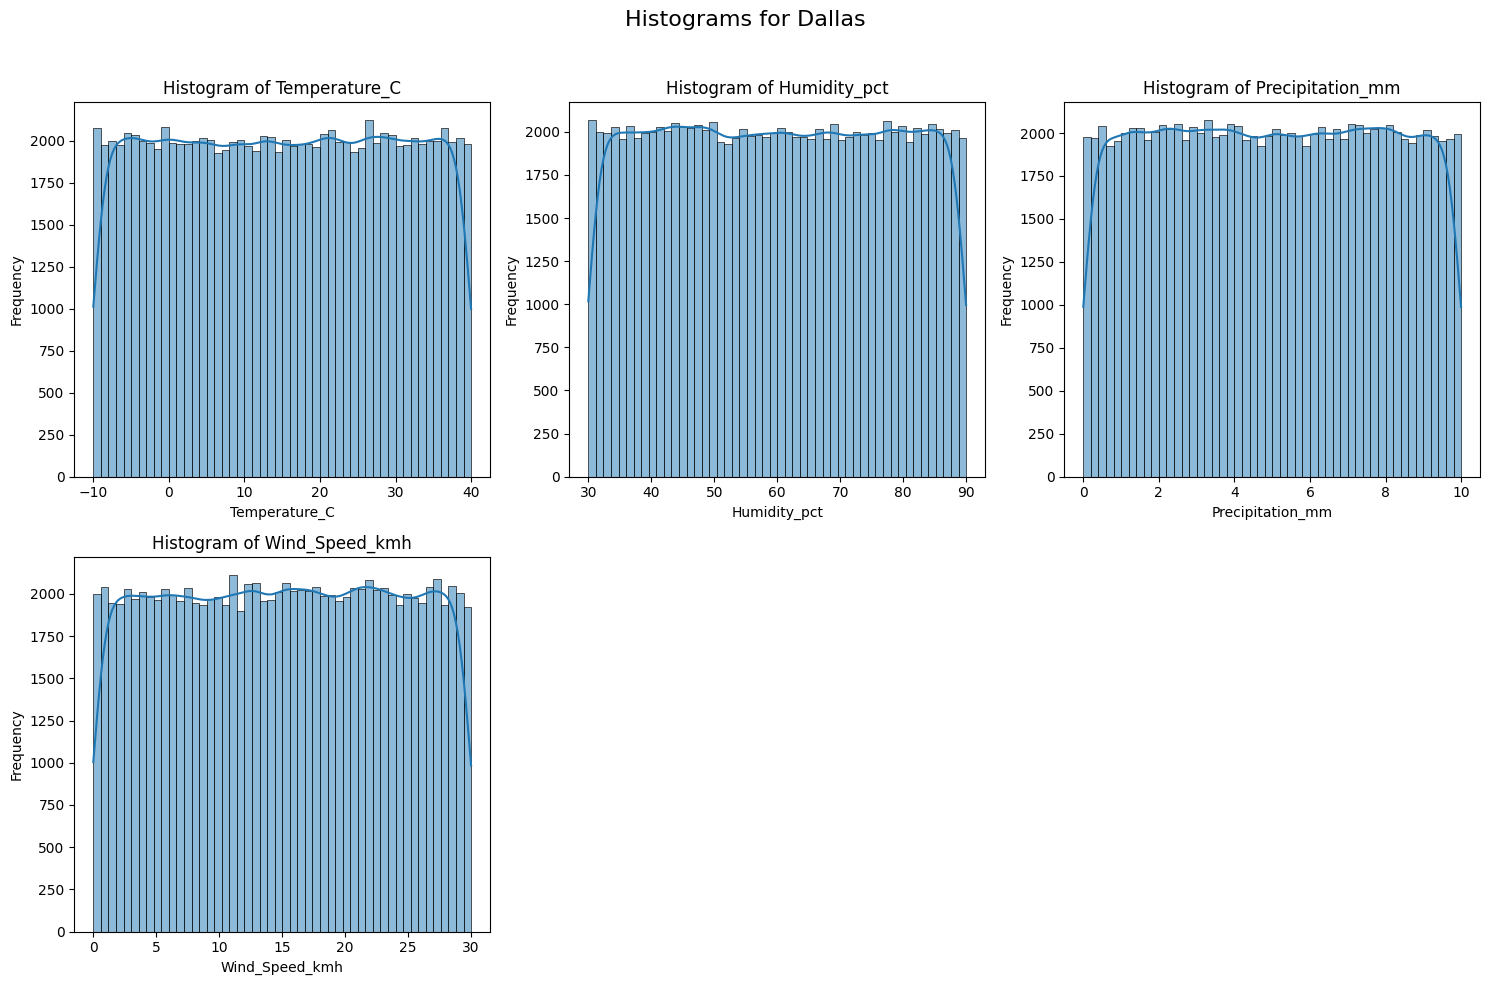

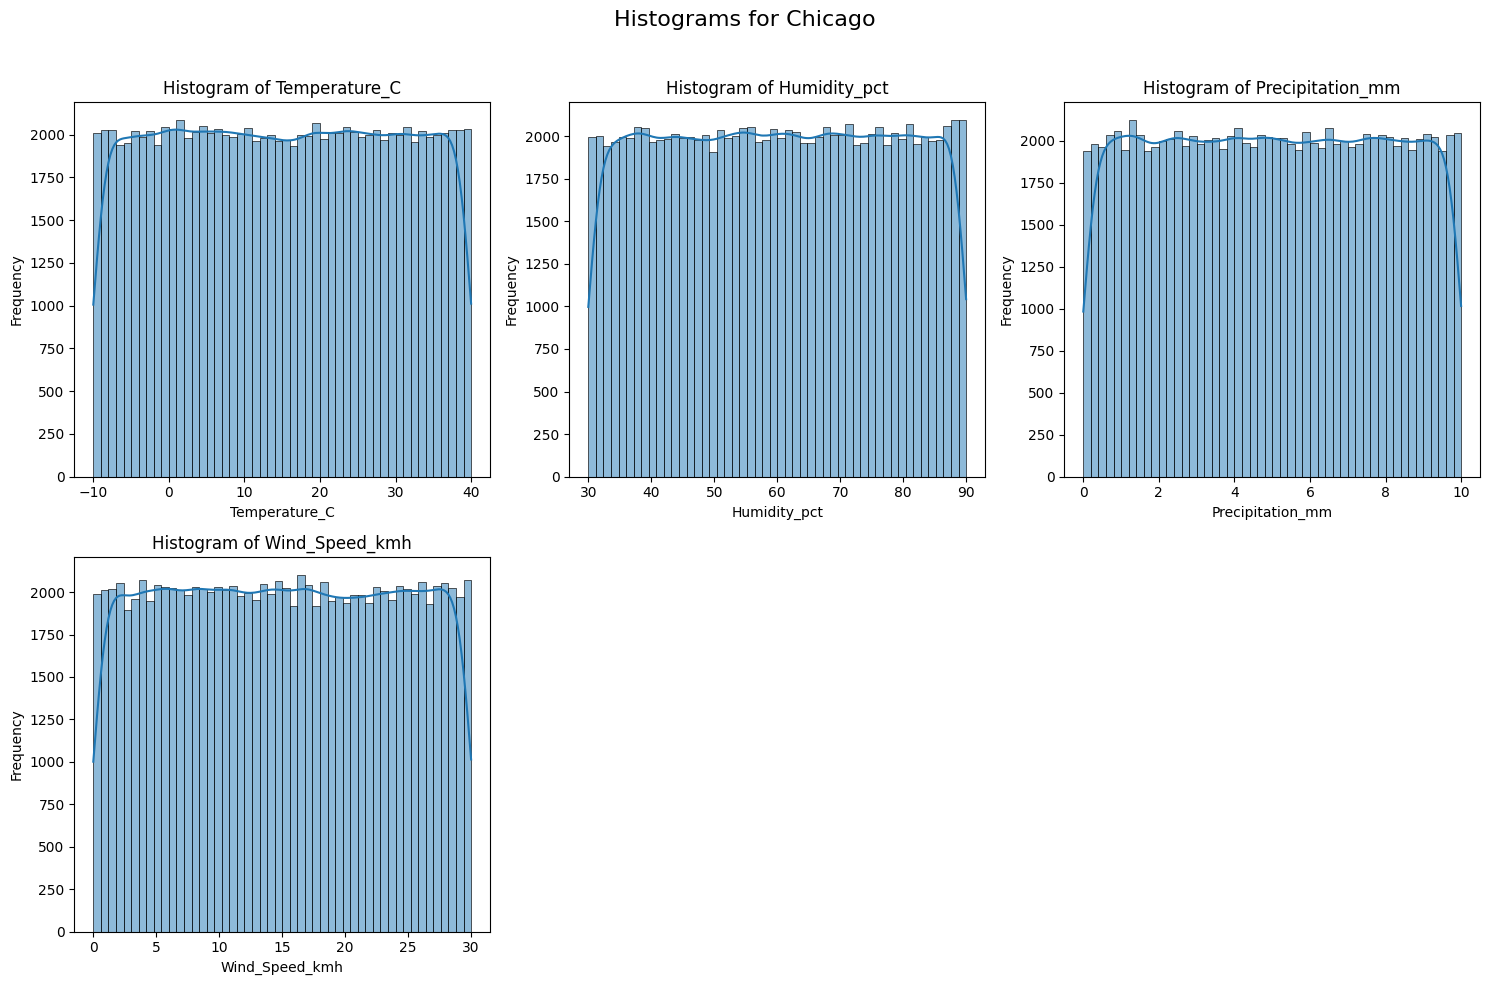

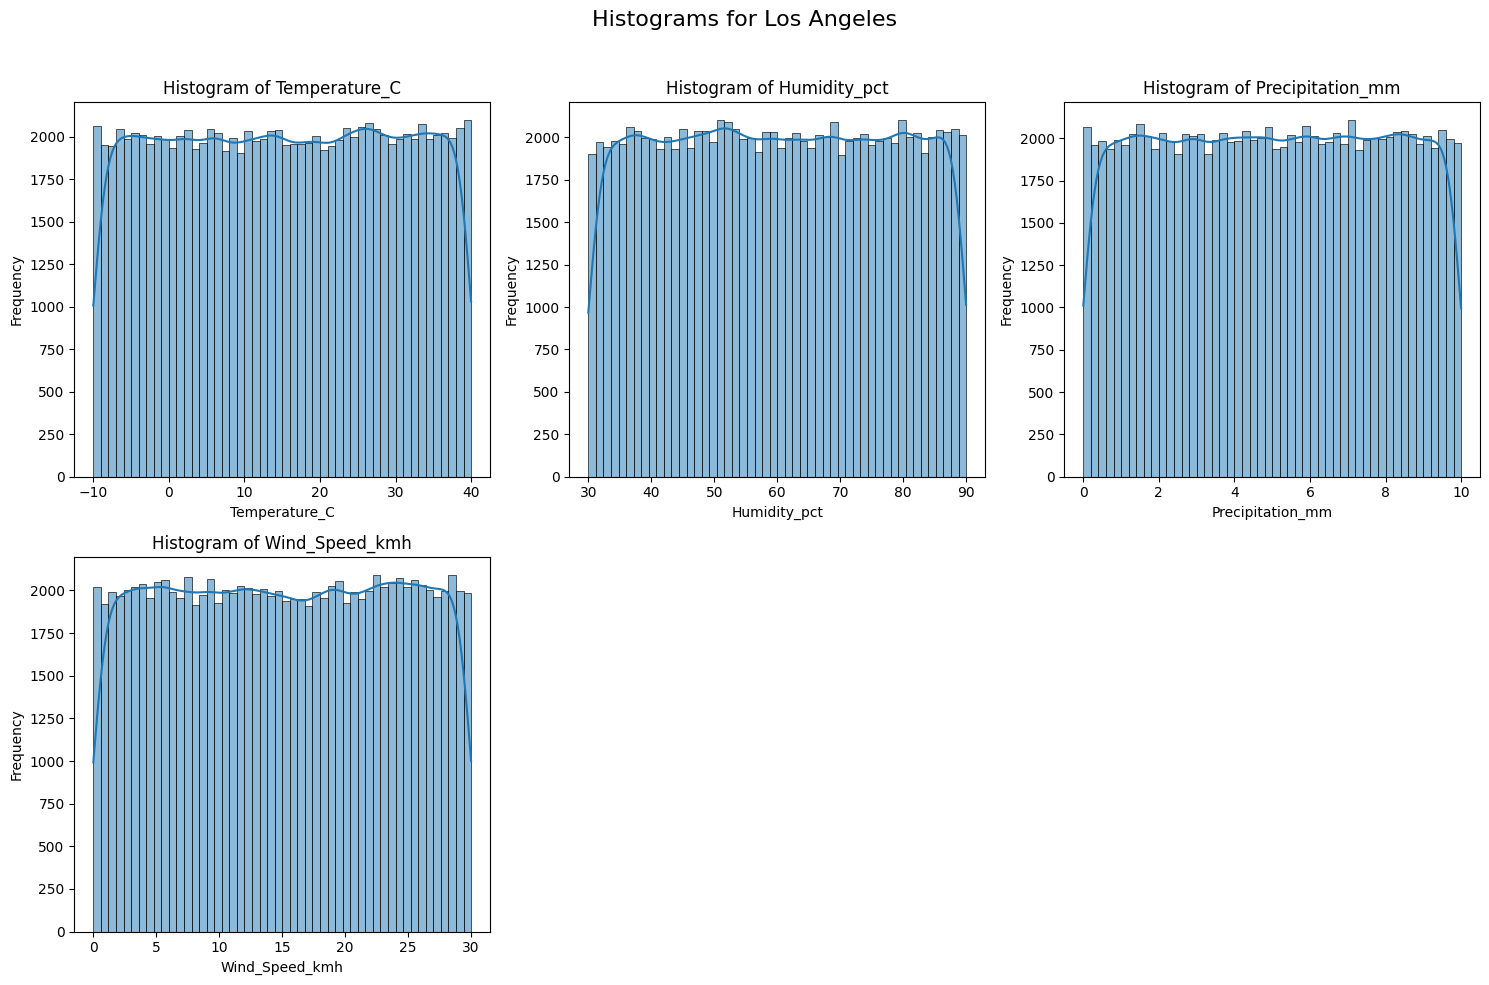

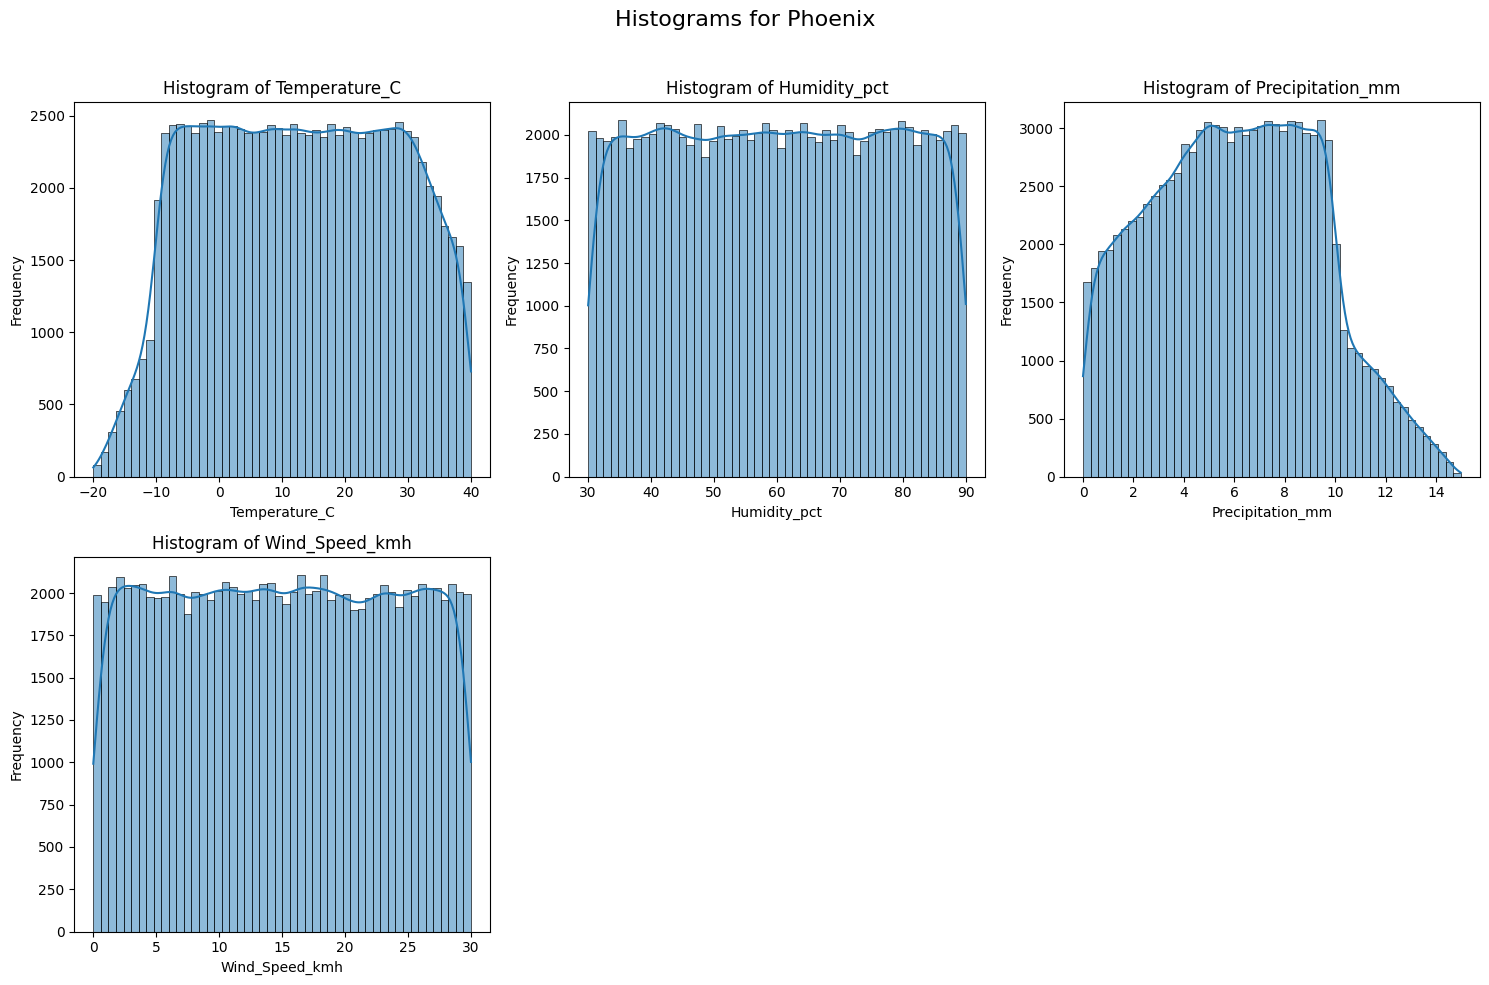

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

numerical = df.select_dtypes(include=['float64', 'int64']).columns

locations = df['Location'].unique()

for location in locations:
    df_location = df[df['Location'] == location]
    
    num_columns = len(numerical)
    num_rows = (num_columns + 2) // 3 
    
    fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
    fig.suptitle(f'Histograms for {location}', fontsize=16)
    
    for i, column in enumerate(numerical):
        row = i // 3
        col = i % 3
        sns.histplot(df_location[column], kde=True, bins=50, ax=axes[row, col])
        axes[row, col].set_title(f'Histogram of {column}')
        axes[row, col].set_xlabel(column)
        axes[row, col].set_ylabel('Frequency')
    
    # Hiding any empty subplots
    for j in range(i + 1, num_rows * 3):
        fig.delaxes(axes.flatten()[j])
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the suptitle
    plt.show()


In [8]:
df[['Date', 'Time']] = df['Date_Time'].str.split(' ', expand=True)


df['Month_num']= df['Date'].str.split("-", expand=True)[1]


months = {'01':"January", '02': "February", '03':"March",
         '04':"April", '05':"May", '06':"June",
         '07':"July", '08':"August", '09':"September",
         '10':"October", '11':"November", '12':"December"}

def convert_mon(x):
    x= months.get(x)
    return x

df['month'] = df['Month_num'].apply(lambda x: convert_mon(x))


In [9]:
df['Hour']= df['Time'].str.split(':', expand=True)[0]

def convert_hour(x):
    if x in ['04','05', '06']:
        x="Dawn"
    elif x in ['07','08','09','10', '11']:
        x="Morning"
    elif x=='12':
        x="Noon"
    elif x in['13', '14', '15', '16']:
        x="AfterNoon"
    elif x in ['17', '18', '19']:
        x="Evening"
    else:
        x="Night"
    return x

df['Time of day']= df['Hour'].apply(lambda x: convert_hour(x))

df.head()

,Location,Date_Time,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh,Date,Time,Month_num,month,Hour,Time of day
0,San Diego,2024-01-14 21:12:46,10.683001,41.195754,4.020119,8.233540,2024-01-14,21:12:46,01,January,21,Night
1,San Diego,2024-05-17 15:22:10,8.734140,58.319107,9.111623,27.715161,2024-05-17,15:22:10,05,May,15,AfterNoon
2,San Diego,2024-05-11 09:30:59,11.632436,38.820175,4.607511,28.732951,2024-05-11,09:30:59,05,May,09,Morning
3,Philadelphia,2024-02-26 17:32:39,-8.628976,54.074474,3.183720,26.367303,2024-02-26,17:32:39,02,February,17,Evening
4,San Antonio,2024-04-29 13:23:51,39.808213,72.899908,9.598282,29.898622,2024-04-29,13:23:51,04,April,13,AfterNoon


In [10]:
weather_analysis = df.select_dtypes(include=['number'])

In [11]:
df['Location'].unique()

array(['San Diego', 'Philadelphia', 'San Antonio', 'San Jose', 'New York',
       'Houston', 'Dallas', 'Chicago', 'Los Angeles', 'Phoenix'],
      dtype=object)

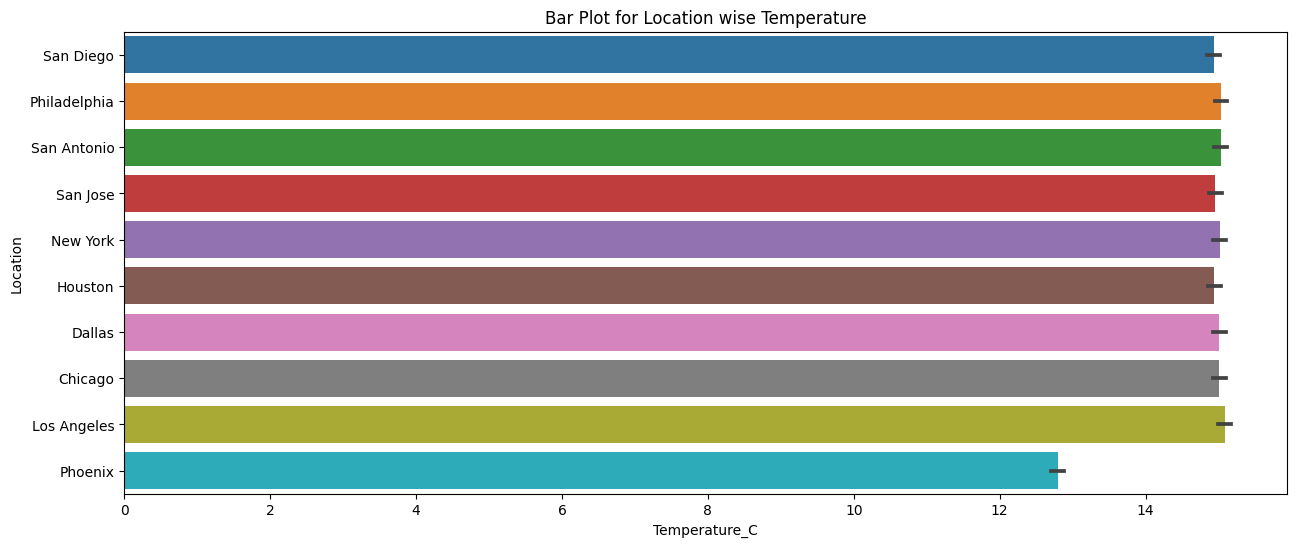

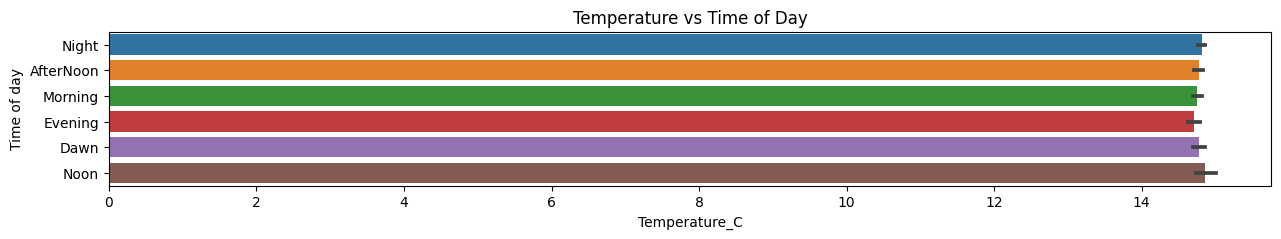

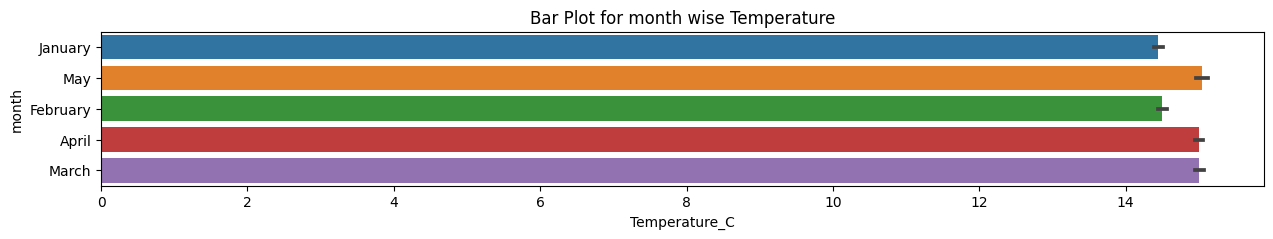

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt



plt.figure(figsize=(15, 6))
sns.barplot(x='Temperature_C', y='Location', data=df)
plt.title('Bar Plot for Location wise Temperature')
plt.show()


plt.figure(figsize=(15, 2))
sns.barplot(x='Temperature_C', y='Time of day', data=df)
plt.title('Temperature vs Time of Day')
plt.show()



plt.figure(figsize=(15, 2))
sns.barplot(x='Temperature_C', y='month', data=df)
plt.title('Bar Plot for month wise Temperature')
plt.show()





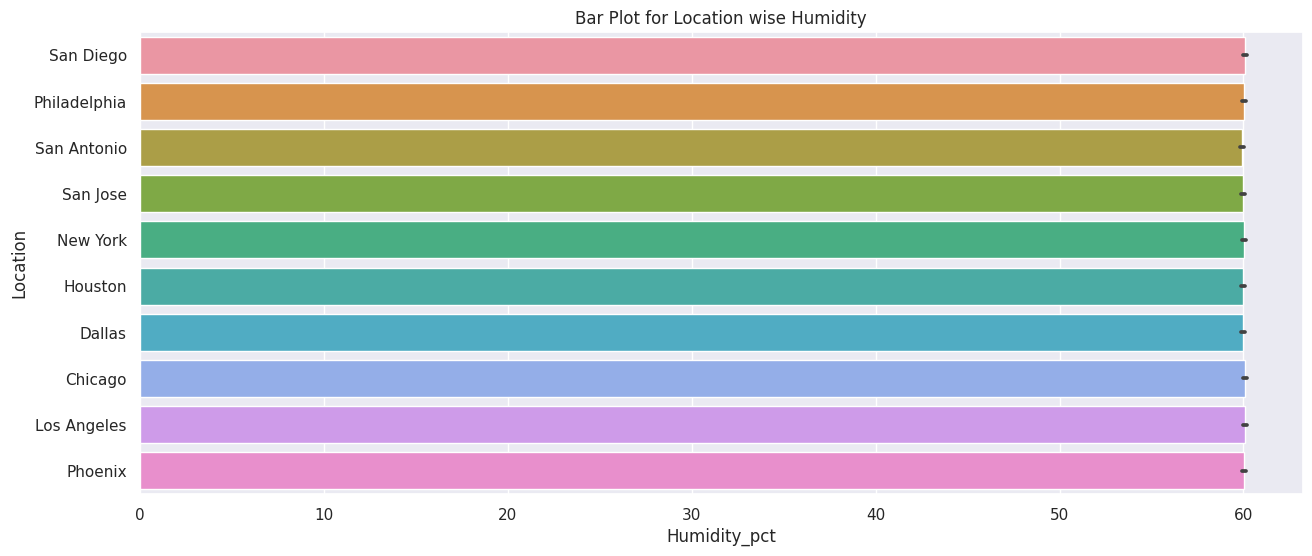

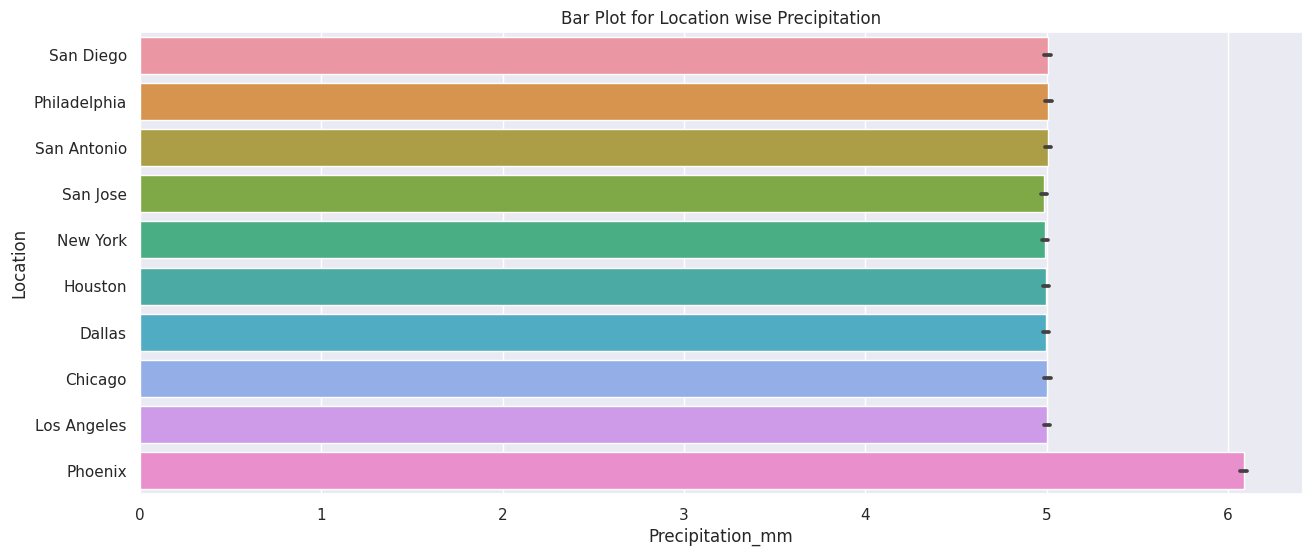

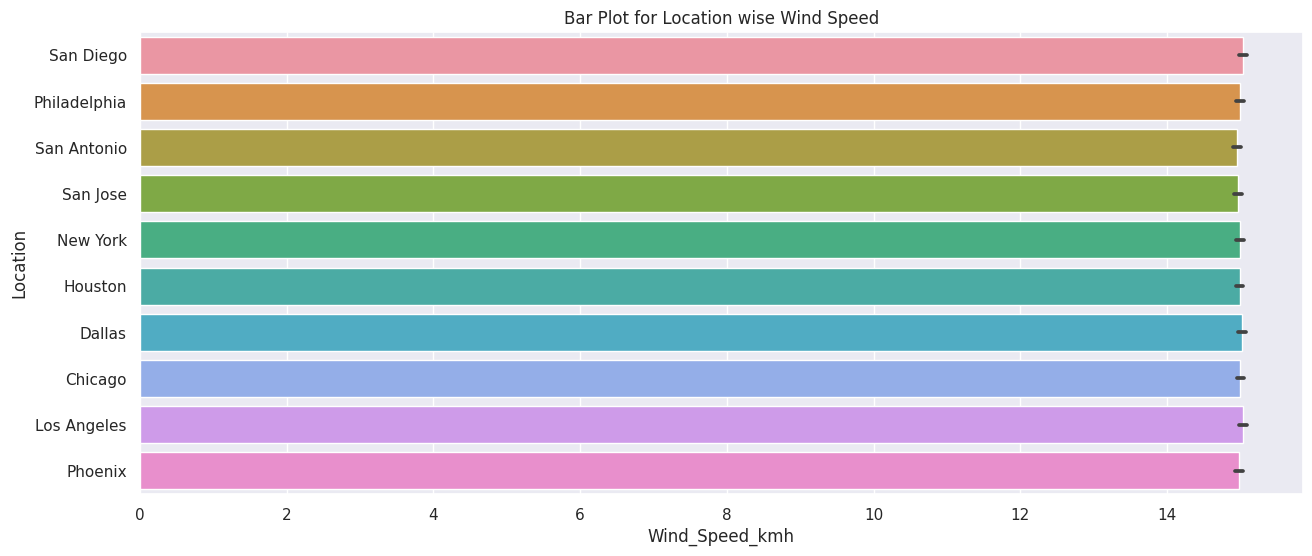

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style='darkgrid')
custom_palette = ['#FF6347', '#4682B4', '#32CD32', '#FFD700']
sns.set_palette(custom_palette)

plt.figure(figsize=(15, 6))
sns.barplot(x='Humidity_pct', y='Location', data=df)
plt.title('Bar Plot for Location wise Humidity')
plt.show()


plt.figure(figsize=(15, 6))
sns.barplot(x='Precipitation_mm', y='Location', data=df)
plt.title('Bar Plot for Location wise Precipitation')
plt.show()

plt.figure(figsize=(15, 6))
sns.barplot(x='Wind_Speed_kmh', y='Location', data=df)
plt.title('Bar Plot for Location wise Wind Speed')
plt.show()




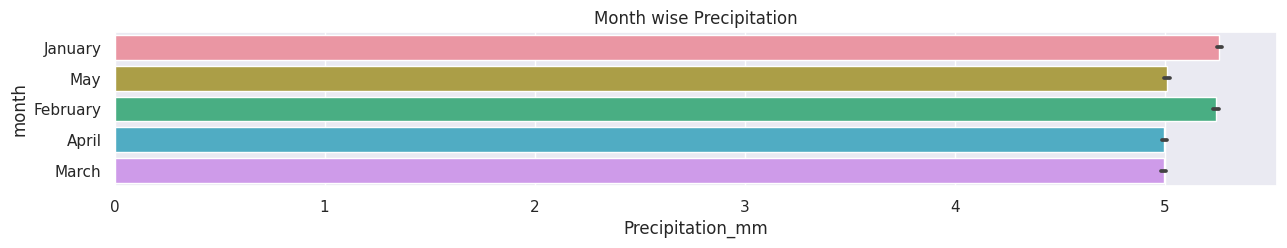

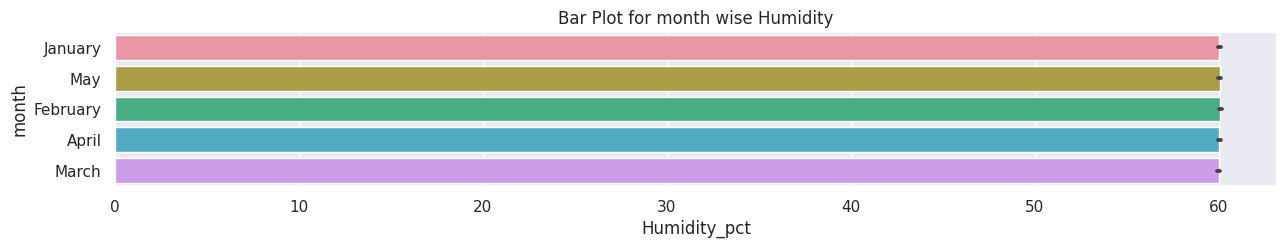

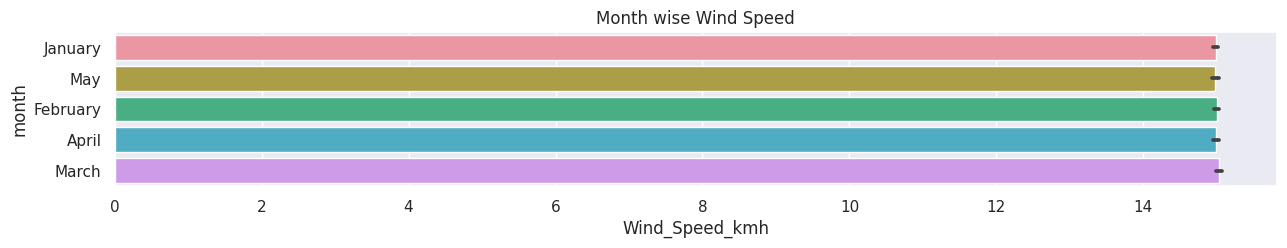

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style='darkgrid')
custom_palette = ['#FF6347', '#4682B4', '#32CD32', '#FFD700']
sns.set_palette(custom_palette)


plt.figure(figsize=(15, 2))
sns.barplot(x='Precipitation_mm', y='month', data=df)
plt.title('Month wise Precipitation')
plt.show()

plt.figure(figsize=(15, 2))
sns.barplot(x='Humidity_pct', y='month', data=df)
plt.title('Bar Plot for month wise Humidity')
plt.show()


plt.figure(figsize=(15, 2))
sns.barplot(x='Wind_Speed_kmh', y='month', data=df)
plt.title('Month wise Wind Speed')
plt.show()

In [15]:

max_temp_index = df['Temperature_C'].idxmax()
max_temp_location = df.loc[max_temp_index, 'Location']
print(f'The location with the highest temperature is: {max_temp_location}')

min_temp_index = df['Temperature_C'].idxmin()
min_temp_location = df.loc[min_temp_index, 'Location']
print(f'The Location with the lowest temperature is: {min_temp_location}')


max_Humid_index = df['Humidity_pct'].idxmax()
max_Humid_location = df.loc[max_Humid_index, 'Location']
print(f'The location with the highest Humidity is: {max_Humid_location}')

min_Humid_index = df['Humidity_pct'].idxmin()
min_Humid_location = df.loc[min_Humid_index, 'Location']
print(f'The location with the lowest Humidity is: {min_Humid_location}')


The location with the highest temperature is: New York
The Location with the lowest temperature is: Phoenix
The location with the highest Humidity is: San Jose
The location with the lowest Humidity is: Philadelphia


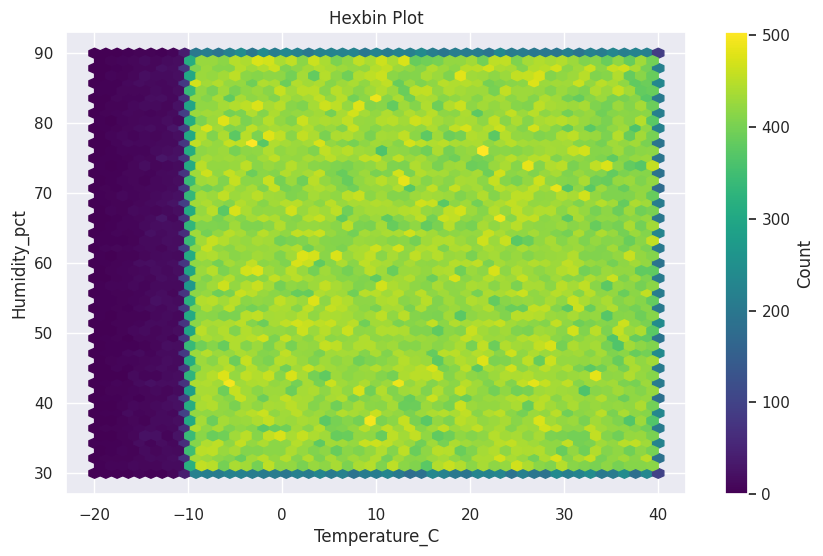

In [16]:
plt.figure(figsize=(10, 6))
plt.hexbin(df['Temperature_C'], df['Humidity_pct'], gridsize=50, cmap='viridis')
plt.colorbar(label='Count')
plt.title('Hexbin Plot')
plt.xlabel('Temperature_C')
plt.ylabel('Humidity_pct')
plt.show()

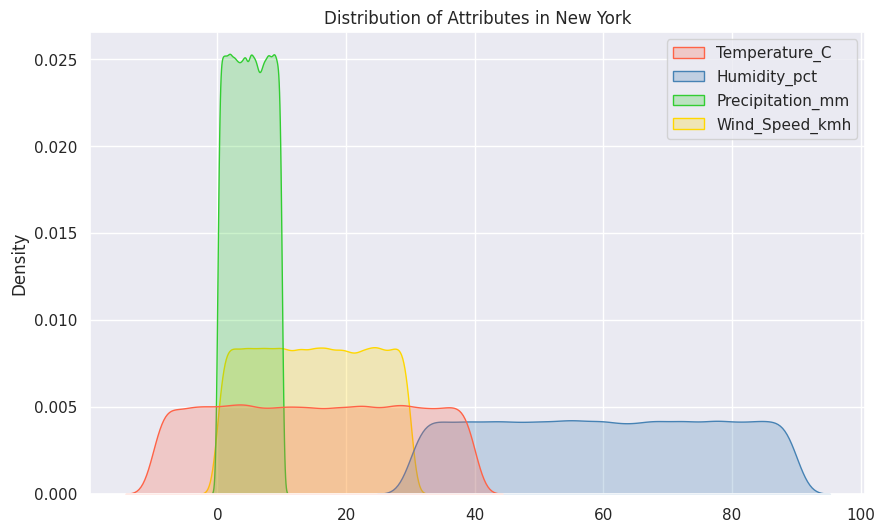

In [17]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df[df['Location'] == 'New York'], fill=True)
plt.title('Distribution of Attributes in New York')
plt.show()

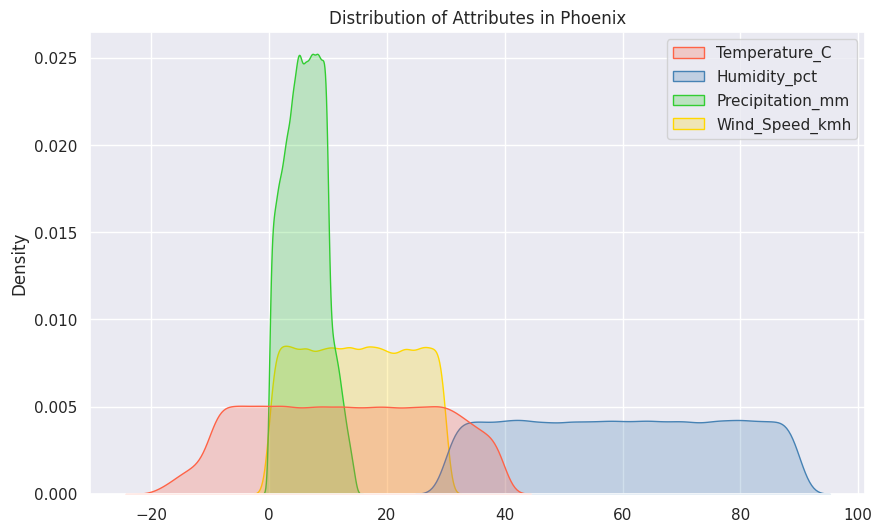

In [18]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df[df['Location'] == 'Phoenix'], fill=True)
plt.title('Distribution of Attributes in Phoenix')
plt.show()

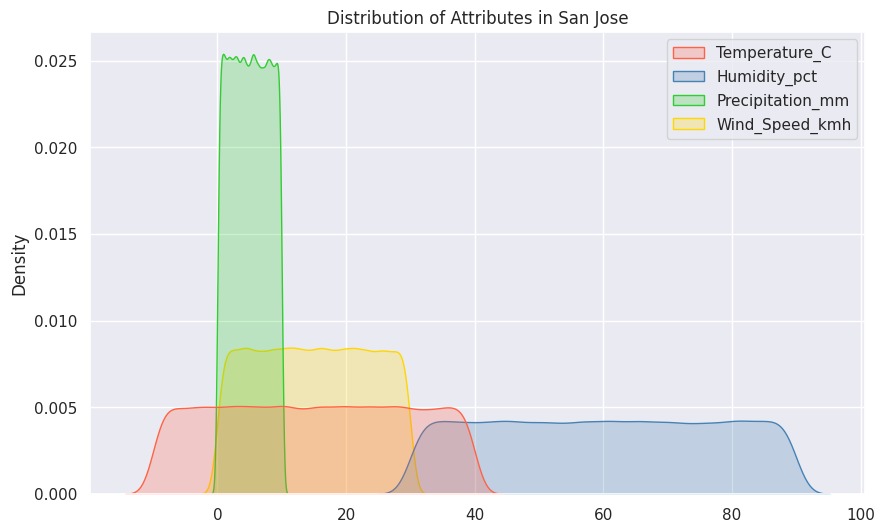

In [19]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df[df['Location'] == 'San Jose'], fill=True)
plt.title('Distribution of Attributes in San Jose')
plt.show()

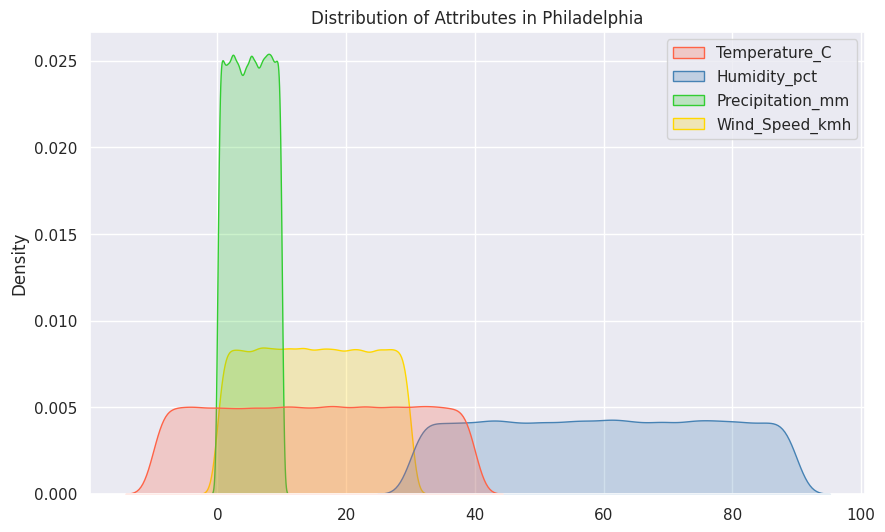

In [20]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df[df['Location'] == 'Philadelphia'], fill=True)
plt.title('Distribution of Attributes in Philadelphia')
plt.show()

# Conclusions:




**Location-Specific Temperature Analysis:**
- **Highest Temperature:** The data indicates that New York consistently records the highest temperatures among all analyzed locations.
- **Lowest Temperature:** Phoenix, contrary to common expectations, has the lowest recorded temperatures, with a minimum value reaching -20°C. This makes Phoenix the location with the lowest maximum temperature compared to other locations.

**Humidity Analysis:**
- **Highest Humidity:** San Jose exhibits the highest humidity levels, indicating a consistently moist environment.
- **Lowest Humidity:** Philadelphia, on the other hand, records the lowest humidity levels, suggesting a drier climate.

**Seasonal Temperature Trends:**
- **Winter (January-February):** These months exhibit comparatively lower temperatures across all locations.
- **Spring to Early Summer (April-June):** This period shows a rise in temperatures, reaching higher values than the winter months.

**Humidity and Wind Speed Variations:**
- The data shows that variations in both humidity and wind speed remain relatively constant when analyzed both location-wise and month-wise. This suggests that these parameters are stable across different regions and seasons.

**Precipitation Patterns:**
- **Higher Precipitation in Colder Months:** There is a noticeable increase in precipitation during the months with lower temperatures, specifically in January and February.
- **Maximum Precipitation in Phoenix:** Following the same pattern, Phoenix having the lowest temperature ranges, records the highest maximum values for precipitation.